<a href="https://colab.research.google.com/github/leobrandoon/AnalisisElectoralChile/blob/main/Cuarto_Dataton_IMMUNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="800"> </center>
*
<center> <h1> 4º Datatón de Immune Institute</h1> </center>
*
 

**********  

¡Bienvenido al Datatón de Immune! Como ya habéis visto en el vídeo, vuestro trabajo consiste en desarrollar un algoritmo con el que podamos predecir quién ganará la aprtida de LOL, si el lado azul o el lado rojo. Para lograr este objetivo, usaréis un conjunto de datos recopilados durante 10 minutos en partidas de alto nivel, donde los jugadores están rankeados como Diamantes o superior. 


**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy, Scikit-learn, Seaborn, etc.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar Notebooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Mejorar la predicción.


¡Comencemos!

## **1. Importa las librerías necesarias**

Vamos ahora a descargar las herramientas necesarías para trabajar.

Nota: Recuerda que para ejecutar cada celda (caja) tienes que usar Shift+Enter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



## **2. Cargar el dataset**

Para cargar los datos, debes subirlos desde la carpeta que tienes en la esquina superior izquierda. Una vez guardados, los almacenaremos en un dataframe llamado df

In [ ]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

### 2.1 Muestra los primeros valores del archivo para hacernos una idea del contenido de la tabla con el código: data.head()

In [ ]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


### 2.1 Variable de salida

La variable que utilizaremos para clasificar los datos será **blueWins** (a partir de ahora *output*). Donde:
- **1** nos indica que el equipo azul **gana la partida**.
- **0** nos indica que  **es el equipo rojo**  el que gana la partida.

### 2.2 Variables de entrada

Como has podido observar en el apartado anterior, para predecir quién va a ganar la aprtida, tenemos un total de **40 variables** asociadas a la mecánica del juego. En total, contamos con una muestra de **9879 partidas.** 



## **3. Analizar dataset:**

![Immune](https://i.imgur.com/FBQ64Uz.png)

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

**a)** Utiliza la función .describe() para analizar la distribución de los datos

In [ ]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


**b)** Vamos a observar cómo están distribuidos nuestros datos.

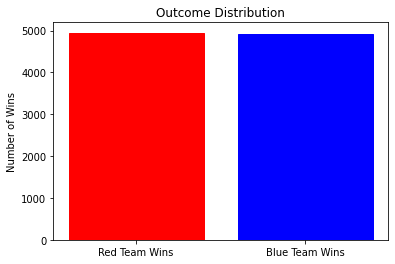

In [ ]:

labels = ['Red Team Wins', 'Blue Team Wins']
red_wins = len(df.blueWins[df['blueWins']==0])
blue_wins = len(df.blueWins[df['blueWins']==1])
wins = (red_wins,blue_wins)
fig = plt.figure()
barPlot = plt.bar(labels,wins)
plt.ylabel('Number of Wins')
plt.title('Outcome Distribution')
barPlot[0].set_color('red')
barPlot[1].set_color('blue')
plt.show()

**c)** Y obtengamos algo más de información de nuestros datos.

### 3.1 Analizar las relaciones de las variables del *dataset*

Uno de los primeros pasos que debe hacer un Data Scientist es analizar si existen o no relaciones entre las variables y la salida.

-  ¿Que método usarías para analizar esta relación?
-  ¿Cuál de estas variables de entrada está relacionada con la variable de salida **output**, y cuál no?


**c)** Crea una matriz de correlación para analizar esta relación entre las variables.

**Ayuda:** puedes usar los siguientes métodos:
- .corr() 
- .style.background_gradient(cmap='coolwarm')

In [ ]:
df.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

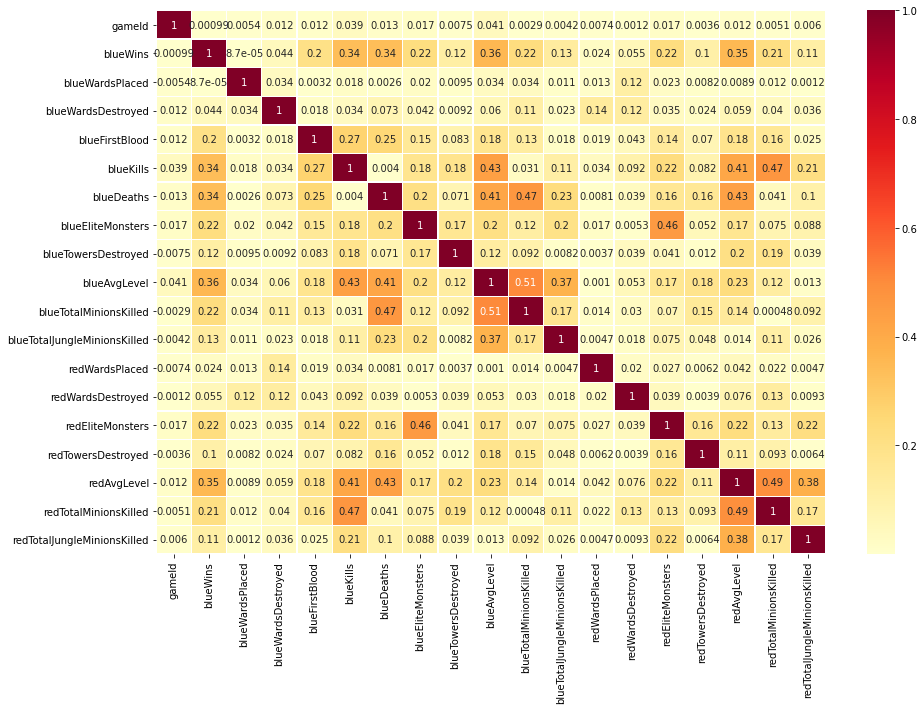

In [ ]:
# Matriz de correlación con valores absolutos
correlation_mat = df.corr().abs()

# Obtención del triángulo superior de la matriz de correlación
upper = correlation_mat.where(np.triu(np.ones(correlation_mat.shape), 
                                  k=1).astype(np.bool))


# Obtención de características con una correlación superior a 0,75
to_drop = [column for column in upper.columns if any(
        upper[column] > 0.75)]

# Dejando esas características 
X = df.drop(to_drop, axis=1)

# Dos columnas se eliminan manualmente porque son subconjuntos de otras
X = X.drop(["blueHeralds"], axis = 1)
X = X.drop(["redHeralds"], axis = 1)

# Eliminación de la columna ID
#X = X.drop(["gameId"],axis=1)

# Pintamos la nueva matriz de correlación
correlation_mat_X = X.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat_X, annot = True, linewidths=.3, cmap ="YlOrRd")
plt.show()

Cuanto más cercano es el valor a 1 o -1, más correlación (lineal) existe. 

- **d)** ¿Cuáles son las variables (features) que más se relacionan con la salida (**output**)?

In [ ]:
# Eliminamos las características con baja correlación con la columna de resultados
X = X.drop(["blueWardsPlaced", "blueWardsDestroyed",
           "blueTowersDestroyed", "blueTotalJungleMinionsKilled",
           "redWardsPlaced", "redWardsDestroyed",
           "redTowersDestroyed", "redTotalJungleMinionsKilled"], axis = 1)

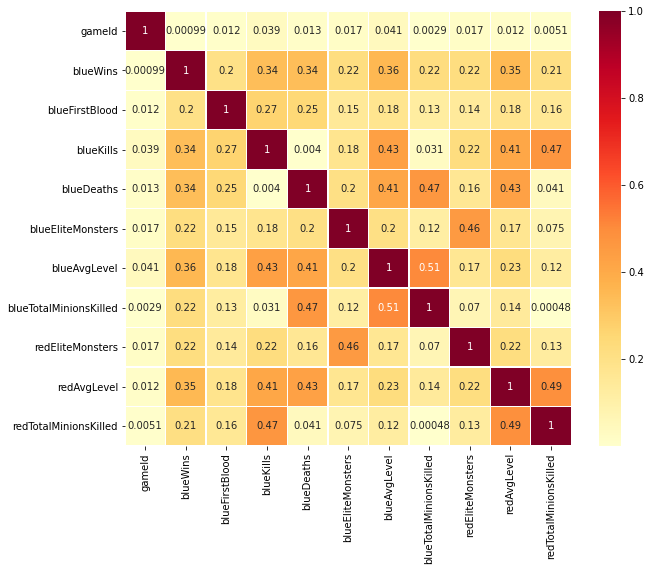

In [ ]:
correlation_mat_X = X.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat_X, annot = True, linewidths=.3, cmap ="YlOrRd")
plt.show()

In [ ]:
# Variables dependientes e independientes
X = X.drop(['blueWins'], axis = 1)
Y = df["blueWins"]

In [ ]:

X.to_csv('./validdataset.csv', index = False)
X = X.drop(['gameId'], axis = 1)

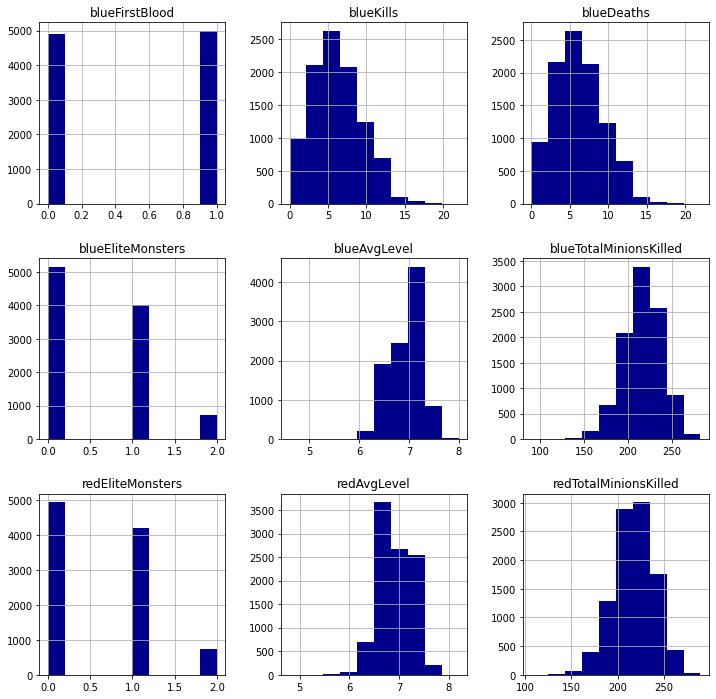

In [ ]:
# Plotting the histograms of selected features
X.hist(figsize=(12,12), color = 'darkblue')
plt.show()

**4.1)** Crea un conjunto de datos de entrenamiento y un conjunto de datos de test.

Intrucciones: 


- **test_size:** no se permite usar más del 20% de datos para crear el test

In [ ]:
from sklearn.model_selection import train_test_split
testSize = 0.2
x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size=testSize, random_state = 4)

**4.2)** Crea la regresión lineal y entrénalo

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**4.3)** Usa el modelo que acabas de entrenar en el conjunto de **X_test** para calcular el acierto del modelo:

In [ ]:
logistic_prob = logistic.predict_proba(x_test)
logistic_prob = logistic_prob[:,-1]

A continuación, vamos a realizar una serie de verificaciones y posteriormente las mostraremos en una tabla, para evaluar la eficacia de nuestro modelo.

Las técnicas que vamos a utilizar son:

<h2>Una curva ROC (curva de característica operativa del recepto)</h2>  Es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

**Tasa de verdaderos positivos**

**Tasa de falsos positivos**

<img src="https://developers.google.com/machine-learning/crash-course/images/ROCCurve.svg?hl=es-419" width="350">


<h2>AUC: Área bajo la curva ROC</h2>

AUC significa "área bajo la curva ROC". Esto significa que el AUC mide toda el área bidimensional por debajo de la curva ROC completa (piensa en un cálculo integral) de (0,0) a (1,1).

<img src="https://developers.google.com/machine-learning/crash-course/images/AUC.svg?hl=es-419" width="350">

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. 


<h2>MAtriz de confusión</h2>

La Matriz de Confusión es una métrica que nos va a permitir conocer el rendimiento y acierto de una clasificación realizada con Machine Learning.
Podemos encontrar información adicional para entender su objectivo en el siguiente enlace: [ConfusionMatrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
 
![texto alternativo](https://miro.medium.com/max/578/1*7EYylA6XlXSGBCF77j_rOA.png) 

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
from tabulate import tabulate


# ROC Curve

logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, logistic_prob)

# AUC Scores

logistic_auc = roc_auc_score(y_test, logistic_prob)

# Best threshold for Logistic Regression Model

equation_logistic = np.sqrt(logistic_tpr * (1-logistic_fpr))
index_logistic = np.argmax(equation_logistic)


# Logistic Regression Model predictions
logistic_prediction = []
for i in logistic_prob:
    if i>= logistic_thresholds[index_logistic]:
        i = 1
        logistic_prediction.append(i)
    else:
        i=0
        logistic_prediction.append(i)


logistic_acc    = accuracy_score(logistic_prediction, y_test)
logistic_prec   = precision_score(logistic_prediction, y_test)
logistic_recall = recall_score(logistic_prediction, y_test)


# Confusion Matrix for Logistic Regression Model
logistic_tn, logistic_fp, logistic_fn, logistic_tp = confusion_matrix(
        y_test, logistic_prediction).ravel()


table = [
['Logistic Regression   ', logistic_acc, logistic_prec, logistic_recall, logistic_tp, logistic_fp, logistic_tn, logistic_fn]
        ] 
print (tabulate(table, headers=["Model", "Accuracy", "Precision", "Recall",
                               "TP", "FP", "TN", "FN"]))

Model                  Accuracy    Precision    Recall    TP    FP    TN    FN
-------------------  ----------  -----------  --------  ----  ----  ----  ----
Logistic Regression    0.739372     0.775202  0.724788   769   292   692   223


## **EVALUACIÓN:**
Es momento de usar nuestro modelo sobre todos nuestros datos y subir nuestra primera aproximación a Kaggle!! 

Cuando termines el reto, utiliza la siguiente función con el modelo que mejor predicción obtuviste. Los parámetros de entrada de la función son:

- Nombre del modelo que deseas entregar
- Nombre tu equipo
 

In [ ]:
#################################
#Función auxiliar (NO MODIFICAR):
#################################

def eval_best_model(final_model,team_name):
    data_valid = pd.read_csv('validdataset.csv')
    
    X_valid = data_valid.drop('gameId',axis = 1)   
       
    y_valid_pred = final_model.predict(X_valid)
    
    submission = pd.DataFrame({ 'id': data_valid['gameId'],
                                'output': y_valid_pred })
    submission.to_csv('./submission_team_'+team_name+'.csv', index = False)
    return(submission)

In [ ]:
eval_best_model(logistic,'nombreyapellidos')

,id,output
0,4519157822,1
1,4523371949,0
2,4521474530,0
3,4524384067,0
4,4436033771,0
...,...,...
9874,4527873286,1
9875,4527797466,1
9876,4527713716,0
9877,4527628313,0


# 6. Mejorar predicción

¿Crees que puedes mejorar la predicción?

Puedes intentar:

- Optimizar los parámetros
- ***Estar al tanto de nuestras redes sociales, donde daremos consejos y pistas sobre otros modelos que puedes usar para mejorar la predicción!***